In [236]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
import math
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.base import clone
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
import re
from sklearn.compose import TransformedTargetRegressor
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import pearsonr
from datetime import datetime
import joblib

pd.set_option("future.no_silent_downcasting", True)
pd.set_option('display.max_columns', 50)  
pd.set_option('display.max_rows', 50)  

In [150]:
def load_data(file_path, target_column):
    """
    Load data for TSV files.
    
    Args:
    - file_path (str): Path to the TSV file.
    - target_column (str): The column to be used as the target for the model.
    
    Returns:
    - X, y 
    """
    # Load the data from the CSV file
    data = pd.read_csv(file_path, sep='\t')
    
    # Check for missing values (optional step)
    # data = data.dropna()
    
    # Split features (X) and target (y)
    X = data.drop(columns=[target_column])
    y = data[target_column]
    return X, y

In [151]:
rents_file_path = '../output/rents/output.csv'
rents_X, rents_y = load_data(rents_file_path, 'price')
rents_X = rents_X.drop(columns=['tenantGender', 'newDevelopmentFinished', 'garageType', 'isSmokingAllowed', 'externalReference', 'thumbnail','topNewDevelopment', 'superTopHighlight', 'hasStaging'])
rents_X

,address,bathrooms,country,distance,hasVideo,latitude,longitude,municipality,numPhotos,operation,propertyCode,province,rooms,priceByArea,detailedType,size,url,propertyType,suggestedTexts,district,neighborhood,status,showAddress,newDevelopment,hasPlan,has3DTour,has360,description,exterior,floor,hasLift,created
0,calle del Olivar,1,es,795,False,40.409677,-3.702176,Madrid,35,rent,96580531,Madrid,1,29.0,{'typology': 'flat'},35.0,https://www.idealista.com/inmueble/96580531/,flat,"{'subtitle': 'Lavapiés-Embajadores, Madrid', '...",Centro,Lavapiés-Embajadores,good,False,False,False,False,True,Urbanissimo Real Estate gestiona en alquiler p...,False,3,True,2024-10-16 09:07:24.163321
1,calle del Cocherón de la Villa,1,es,6936,False,40.381809,-3.632427,Madrid,34,rent,104531082,Madrid,2,16.0,{'typology': 'flat'},70.0,https://www.idealista.com/inmueble/104531082/,flat,"{'subtitle': 'Palomeras sureste, Madrid', 'tit...",Puente de Vallecas,Palomeras sureste,good,False,False,False,False,False,Piso de 70m2 situado en finca de construcción ...,True,1,True,2024-10-16 09:07:24.163528
2,barrio Acacias,2,es,1524,False,40.404241,-3.707883,Madrid,36,rent,106237949,Madrid,2,23.0,{'typology': 'flat'},70.0,https://www.idealista.com/inmueble/106237949/,flat,"{'subtitle': 'Acacias, Madrid', 'title': 'Piso'}",Arganzuela,Acacias,good,False,False,True,False,False,"Luminoso piso en Acacias, a un paso del Metro ...",True,NaN,True,2024-10-16 09:07:24.163686
3,barrio Pueblo Nuevo,1,es,5239,False,40.433520,-3.642523,Madrid,11,rent,93757751,Madrid,0,18.0,"{'typology': 'flat', 'subTypology': 'studio'}",39.0,https://www.idealista.com/inmueble/93757751/,studio,"{'subtitle': 'Pueblo Nuevo, Madrid', 'title': ...",Ciudad Lineal,Pueblo Nuevo,good,False,False,False,False,False,ESTANCIA MINIMA DE 1 AÑO¡ Fantástico piso de 1...,True,3,False,2024-10-16 09:07:24.164056
4,calle de la Infanta Mercedes,2,es,4151,False,40.454013,-3.699185,Madrid,18,rent,106275978,Madrid,3,13.0,{'typology': 'flat'},142.0,https://www.idealista.com/inmueble/106275978/,flat,"{'subtitle': 'Cuatro Caminos, Madrid', 'title'...",Tetuán,Cuatro Caminos,good,False,False,False,False,False,Ponemos en alquiler este piso disponible para ...,True,6,True,2024-10-16 09:07:24.164383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7826,Barrio Lavapiés-Embajadores,1,es,773,False,40.411228,-3.706004,Madrid,3,rent,107182368,Madrid,1,23.0,"{'typology': 'flat', 'subTypology': 'duplex'}",82.0,https://www.idealista.com/inmueble/107182368/,duplex,"{'subtitle': 'Lavapiés-Embajadores, Madrid', '...",Centro,Lavapiés-Embajadores,good,False,False,False,False,False,¡Descubre el encanto de vivir en el corazón de...,False,4,True,2025-02-02 07:45:41.926282
7827,Barrio Lavapiés-Embajadores,1,es,1000,False,40.408379,-3.704868,Madrid,13,rent,107146291,Madrid,2,35.0,{'typology': 'flat'},37.0,https://www.idealista.com/inmueble/107146291/,flat,"{'subtitle': 'Lavapiés-Embajadores, Madrid', '...",Centro,Lavapiés-Embajadores,good,False,False,False,False,False,Deapi alquila un piso en Mira el Sol. Se encue...,True,4,False,2025-02-02 07:45:41.926476
7828,Barrio Argüelles,1,es,1948,False,40.426603,-3.719325,Madrid,10,rent,107135508,Madrid,2,27.0,{'typology': 'flat'},75.0,https://www.idealista.com/inmueble/107135508/,flat,"{'subtitle': 'Argüelles, Madrid', 'title': 'Pi...",Moncloa,Argüelles,good,False,False,False,False,False,Se alquila piso muy confortable y luminoso en ...,False,bj,True,2025-02-02 07:45:41.926644
7829,calle de Tomás Bretón,2,es,1997,False,40.399211,-3.694913,Madrid,0,rent,107152779,Madrid,2,12.0,{'typology': 'flat'},120.0,https://www.idealista.com/inmueble/107152779/,flat,"{'subtitle': 'Delicias, Madrid', 'title': 'Pis...",Arganzuela,Delicias,good,False,False,False,False,False,MIREN INMOBILIARIA. - ALQUILA. -. Piso nuevo e...,True,1,False,2025-02-02 07:45:41.926876


In [152]:
sales_file_path = '../output/sales/output.csv'
sales_X, sales_y = load_data(sales_file_path, 'price')
sales_X = sales_X.drop(columns=['tenantGender', 'newDevelopmentFinished', 'garageType', 'isSmokingAllowed', 'externalReference', 'thumbnail', 'topNewDevelopment', 'superTopHighlight', 'hasStaging'])
sales_X

,address,bathrooms,country,distance,hasVideo,latitude,longitude,municipality,numPhotos,operation,propertyCode,province,rooms,priceByArea,detailedType,size,url,propertyType,suggestedTexts,district,neighborhood,status,showAddress,newDevelopment,hasPlan,has3DTour,has360,description,exterior,floor,hasLift,created
0,calle de los Mancebos,1,es,1218,True,40.412444,-3.713620,Madrid,31,sale,106032090,Madrid,1,6111.0,{'typology': 'flat'},36.0,https://www.idealista.com/inmueble/106032090/,flat,"{'subtitle': 'Palacio, Madrid', 'title': 'Piso...",Centro,Palacio,good,False,False,True,False,True,La Casa Agency se complace en presentar esta e...,False,3,False,2024-10-16 09:07:20.231691
1,barrio Salvador,1,es,5912,True,40.441886,-3.638825,Madrid,30,sale,106209644,Madrid,2,3750.0,{'typology': 'flat'},88.0,https://www.idealista.com/inmueble/106209644/,flat,"{'subtitle': 'Salvador, Madrid', 'title': 'Piso'}",San Blas,Salvador,good,False,False,True,False,False,Excelente piso ubicado en el eje de Arturo Sor...,True,1,True,2024-10-16 09:07:20.231885
2,calle de La Bañeza,1,es,6600,False,40.475361,-3.712241,Madrid,32,sale,106263199,Madrid,2,5672.0,{'typology': 'flat'},58.0,https://www.idealista.com/inmueble/106263199/,flat,"{'subtitle': 'Pilar, Madrid', 'title': 'Piso e...",Fuencarral,Pilar,good,False,False,True,False,True,Grupo Extra te presenta una exclusiva oportuni...,True,8,True,2024-10-16 09:07:20.232108
3,calle de Embajadores,1,es,2594,False,40.393707,-3.695070,Madrid,34,sale,105750748,Madrid,2,5341.0,{'typology': 'flat'},44.0,https://www.idealista.com/inmueble/105750748/,flat,"{'subtitle': 'Delicias, Madrid', 'title': 'Pis...",Arganzuela,Delicias,good,False,False,True,False,True,Si estás buscando un hogar que combine comodid...,False,2,True,2024-10-16 09:07:20.232260
4,"calle Esperanza Sánchez Carrascosa, 45",1,es,5781,True,40.468666,-3.702268,Madrid,11,sale,106220515,Madrid,2,5063.0,{'typology': 'flat'},79.0,https://www.idealista.com/obra-nueva/106220515/,flat,"{'subtitle': 'Valdeacederas, Madrid', 'title':...",Tetuán,Valdeacederas,newdevelopment,True,True,True,False,False,OBRA INICIADA Esperanza Urban Madrid será un e...,True,1,True,2024-10-16 09:07:20.232482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5060,camino de Perales,2,es,4532,False,40.376857,-3.688999,Madrid,0,sale,107192413,Madrid,3,4111.0,{'typology': 'flat'},63.0,https://www.idealista.com/inmueble/107192413/,flat,"{'subtitle': 'San Fermín, Madrid', 'title': 'P...",Usera,San Fermín,good,False,False,False,False,False,"Piso para entrar a vivir de 3 dormitorios, 2 b...",True,4,True,2025-02-02 07:45:37.453601
5061,calle Clarisas,1,es,3680,False,40.391731,-3.728899,Madrid,0,sale,107192691,Madrid,1,3440.0,{'typology': 'flat'},50.0,https://www.idealista.com/inmueble/107192691/,flat,"{'subtitle': 'Opañel, Madrid', 'title': 'Piso ...",Carabanchel,Opañel,good,False,False,False,False,False,Piso amplio de 1 dormitorio con armario empotr...,True,2,False,2025-02-02 07:45:37.453745
5062,Barrio Numancia,1,es,4092,False,40.397525,-3.659084,Madrid,0,sale,107138539,Madrid,2,2127.0,{'typology': 'flat'},72.0,https://www.idealista.com/inmueble/107138539/,flat,"{'subtitle': 'Numancia, Madrid', 'title': 'Piso'}",Puente de Vallecas,Numancia,renew,False,False,False,False,False,¡MUY IMPORTANTE! ADQUISICIÓN NO FINANCIABLE. S...,True,4,False,2025-02-02 07:45:37.453885
5063,Barrio Orcasitas,1,es,5036,False,40.372026,-3.710219,Madrid,0,sale,107138811,Madrid,3,1093.0,{'typology': 'flat'},90.0,https://www.idealista.com/inmueble/107138811/,flat,"{'subtitle': 'Orcasitas, Madrid', 'title': 'Pi...",Usera,Orcasitas,renew,False,False,False,False,False,¡MUY IMPORTANTE! ADQUISICIÓN NO FINANCIABLE. S...,True,1,True,2025-02-02 07:45:37.454035


In [153]:
sales_X['status'].value_counts()

status
good              4018
renew              892
newdevelopment     133
unknown             22
Name: count, dtype: int64

In [154]:
sales_X.isnull().sum()

address             0
bathrooms           0
country             0
distance            0
hasVideo            0
latitude            0
longitude           0
municipality        0
numPhotos           0
operation           0
propertyCode        0
province            0
rooms               0
priceByArea         0
detailedType        0
size                0
url                 0
propertyType        0
suggestedTexts      0
district            0
neighborhood        0
status              0
showAddress         0
newDevelopment      0
hasPlan             0
has3DTour           0
has360              0
description        17
exterior            0
floor             310
hasLift            93
created             0
dtype: int64

In [155]:
rents_X.isnull().sum()

address             0
bathrooms           0
country             0
distance            0
hasVideo            0
latitude            0
longitude           0
municipality        0
numPhotos           0
operation           0
propertyCode        0
province            0
rooms               0
priceByArea         0
detailedType        0
size                0
url                 0
propertyType        0
suggestedTexts      0
district            0
neighborhood        0
status              0
showAddress         0
newDevelopment      0
hasPlan             0
has3DTour           0
has360              0
description        28
exterior            0
floor             427
hasLift            44
created             0
dtype: int64

In [156]:
def transform_hasLift(df):
    df.loc[((df['propertyType'] == 'flat') | (df['propertyType'] == 'penthouse') | (df['propertyType'] == 'studio')) & (df['hasLift'].isna()), 'hasLift'] = False
    return df

def transformed_floor(df):
    df.loc[((df['propertyType'] == 'flat') | (df['propertyType'] == 'penthouse') | (df['propertyType'] == 'studio')) & (df['floor'].isna()), 'floor'] = '-1'
    return df

def add_bare_title(df):
    df['bare_tittle'] = df['description'].fillna('').str.contains('nuda', case=False).astype(int)
    return df

def add_garage(df):
    df['garage'] = df['description'].fillna('').str.contains('garaje', case=False).astype(int)
    return df

def add_storage_room(df):
    df['storage_room'] = df['description'].fillna('').str.contains('trastero', case=False).astype(int)
    return df

def add_suite_bathroom(df):
    df['suite_bath'] = df['description'].fillna('').str.contains('suite', case=False).astype(int)
    return df

def add_janitor(df):
    df['janitor'] = df['description'].fillna('').str.contains('portero', case=False).astype(int)
    return df

def add_pool(df):
    df['pool'] = df['description'].fillna('').str.contains('piscina', case=False).astype(int)
    return df


def add_animal(df):
    df['animal'] = df['description'].fillna('').str.contains('animal', case=False).astype(int)
    return df

def remove_terms(df, terms):
    pattern = '|'.join(map(re.escape, terms))
    df['remove_by_term'] = df['description'].str.contains(pattern, case=False, na=False)
    return df

def index_bare_title_positives(df):
    return df.index[df['bare_tittle'] == 1].tolist()

def index_remove_terms(df):
    return df.index[df['remove_by_term'] == 1].tolist()

def index_bassement_possitives(df):
    return df.index[df['isBassement'] == 1].tolist()


def add_is_bassement(df):
    df['isBassement'] = df['floor'].fillna('None').isin(['bj', 'ss', 'st', '-1', '-2', 'en']).astype(int)
    return df

def date_to_unix(df):
    df['created'] = df['created'].map(lambda x : datetime.strptime(x,  "%Y-%m-%d %H:%M:%S.%f").timestamp())
    return df

rents_X = transform_hasLift(rents_X)
rents_X = transformed_floor(rents_X)
rents_X = add_is_bassement(rents_X)
rents_X = add_garage(rents_X)
rents_X = add_storage_room(rents_X)
rents_X = add_suite_bathroom(rents_X)
rents_X = add_janitor(rents_X)
rents_X = add_pool(rents_X)
rents_X = add_animal(rents_X)
rents_X = date_to_unix(rents_X)

sales_X = transform_hasLift(sales_X)
sales_X = transformed_floor(sales_X)
sales_X = add_bare_title(sales_X)
sales_X = add_is_bassement(sales_X)
sales_X = add_garage(sales_X)
sales_X = add_storage_room(sales_X)
sales_X = add_suite_bathroom(sales_X)
sales_X = add_janitor(sales_X)
sales_X = add_pool(sales_X)
sales_X = add_animal(sales_X)
sales_X = date_to_unix(sales_X)

sales_X = remove_terms(sales_X, ['okupada', 'subasta', 'ocup'])
bare_title_index = index_bare_title_positives(sales_X)
sales_X = sales_X.drop(bare_title_index, axis=0)
sales_y = sales_y.drop(bare_title_index, axis=0)
bassement_index = index_bassement_possitives(rents_X)
rents_X = rents_X.drop(bassement_index, axis=0)
rents_y = rents_y.drop(bassement_index, axis=0)
remove_terms_index = index_remove_terms(sales_X)
sales_X = sales_X.drop(remove_terms_index, axis=0)
sales_y = sales_y.drop(remove_terms_index, axis=0)

In [157]:
sales_X.isnull().sum() 

address            0
bathrooms          0
country            0
distance           0
hasVideo           0
latitude           0
longitude          0
municipality       0
numPhotos          0
operation          0
propertyCode       0
province           0
rooms              0
priceByArea        0
detailedType       0
size               0
url                0
propertyType       0
suggestedTexts     0
district           0
neighborhood       0
status             0
showAddress        0
newDevelopment     0
hasPlan            0
has3DTour          0
has360             0
description       17
exterior           0
floor             57
hasLift           53
created            0
bare_tittle        0
isBassement        0
garage             0
storage_room       0
suite_bath         0
janitor            0
pool               0
animal             0
remove_by_term     0
dtype: int64

In [158]:
rents_X.isnull().sum()

address            0
bathrooms          0
country            0
distance           0
hasVideo           0
latitude           0
longitude          0
municipality       0
numPhotos          0
operation          0
propertyCode       0
province           0
rooms              0
priceByArea        0
detailedType       0
size               0
url                0
propertyType       0
suggestedTexts     0
district           0
neighborhood       0
status             0
showAddress        0
newDevelopment     0
hasPlan            0
has3DTour          0
has360             0
description       20
exterior           0
floor             19
hasLift           12
created            0
isBassement        0
garage             0
storage_room       0
suite_bath         0
janitor            0
pool               0
animal             0
dtype: int64

In [159]:
sales_X[sales_X.isna().any(axis=1)]

,address,bathrooms,country,distance,hasVideo,latitude,longitude,municipality,numPhotos,operation,propertyCode,province,rooms,priceByArea,detailedType,size,url,propertyType,suggestedTexts,district,neighborhood,status,showAddress,newDevelopment,hasPlan,has3DTour,has360,description,exterior,floor,hasLift,created,bare_tittle,isBassement,garage,storage_room,suite_bath,janitor,pool,animal,remove_by_term
48,avenida de Nuestra Señora de Valvanera,1,es,4210,False,40.395889,-3.741898,Madrid,65,sale,106239322,Madrid,4,2222.0,"{'typology': 'chalet', 'subTypology': 'indepen...",126.0,https://www.idealista.com/inmueble/106239322/,chalet,"{'subtitle': 'Los Cármenes, Madrid', 'title': ...",Latina,Los Cármenes,good,False,False,True,False,True,LINKCASA SERVICIO INMOBILIARIO vende en exclus...,False,NaN,NaN,1.729062e+09,0,0,0,0,0,0,0,0,False
293,pasaje del español,1,es,3286,False,40.392388,-3.722435,Madrid,22,sale,97074647,Madrid,3,2009.0,"{'typology': 'chalet', 'subTypology': 'semidet...",117.0,https://www.idealista.com/inmueble/97074647/,chalet,"{'subtitle': 'Opañel, Madrid', 'title': 'Chale...",Carabanchel,Opañel,good,False,False,False,False,False,"Si buscas una casa baja, en el corazón de Urge...",False,NaN,NaN,1.729062e+09,0,0,0,1,0,0,0,0,False
314,calle de Sepúlveda,1,es,4387,False,40.404324,-3.749557,Madrid,17,sale,106223565,Madrid,2,3364.0,{'typology': 'flat'},55.0,https://www.idealista.com/inmueble/106223565/,flat,"{'subtitle': 'Lucero, Madrid', 'title': 'Piso ...",Latina,Lucero,good,False,False,True,False,False,NaN,True,1,False,1.729062e+09,0,0,0,0,0,0,0,0,False
384,calle de Peña de la Atalaya,2,es,4433,False,40.387480,-3.664703,Madrid,1,sale,106229182,Madrid,2,1756.0,"{'typology': 'flat', 'subTypology': 'duplex'}",123.0,https://www.idealista.com/inmueble/106229182/,duplex,"{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",Puente de Vallecas,San Diego,good,False,False,False,False,False,"Piso de 123 m², de 3 dormitorios y 2 baños, en...",False,NaN,False,1.729062e+09,0,0,0,0,0,0,0,0,False
538,calle de Gomeznarro,1,es,6581,False,40.461269,-3.649175,Madrid,17,sale,106327915,Madrid,2,5985.0,"{'typology': 'chalet', 'subTypology': 'semidet...",66.0,https://www.idealista.com/inmueble/106327915/,chalet,"{'subtitle': 'Canillas, Madrid', 'title': 'Cha...",Hortaleza,Canillas,good,False,False,False,False,False,Agencia inmobiliaria en zona CANILLAS - PALACI...,False,NaN,NaN,1.729685e+09,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4505,calle Ascensión Bielsa,2,es,3782,False,40.399245,-3.661988,Madrid,25,sale,106258000,Madrid,3,1778.0,"{'typology': 'chalet', 'subTypology': 'terrace...",90.0,https://www.idealista.com/inmueble/106258000/,chalet,"{'subtitle': 'Numancia, Madrid', 'title': 'Cha...",Puente de Vallecas,Numancia,good,False,False,False,False,False,No se cobra comisión al comprador. ¡Descubre e...,False,NaN,NaN,1.737703e+09,0,0,0,0,0,0,0,0,False
4655,Barrio Canillas,2,es,6380,False,40.460121,-3.651077,Madrid,40,sale,107146567,Madrid,3,3798.0,"{'typology': 'chalet', 'subTypology': 'terrace...",104.0,https://www.idealista.com/inmueble/107146567/,chalet,"{'subtitle': 'Canillas, Madrid', 'title': 'Cha...",Hortaleza,Canillas,good,False,False,True,False,True,VOhome propiedades vende en exclusiva chalet a...,False,NaN,NaN,1.738479e+09,0,0,0,0,0,0,0,0,False
4694,calle Conde de Eleta,2,es,5643,True,40.380930,-3.747643,Madrid,35,sale,107163075,Madrid,4,2287.0,"{'typology': 'chalet', 'subTypology': 'indepen...",164.0,https://www.idealista.com/inmueble/107163075/,chalet,"{'subtitle': 'Vista Alegre, Madrid', 'title': ...",Carabanchel,Vista Alegre,renew,False,False,False,False,False,OPORTUNIDAD! Vivienda venta en la zona de Cara...,False,NaN,NaN,1.738479e+09,0,0,0,1,0,0,0,0,False
4879,calle de Sambara,2,es,5734,False,40.439001,-3.639260,Madrid,27,sale,106775338,Madrid,3,5528.0,"{'typology': 'chalet', 'subTypology'

In [160]:
rents_X[rents_X.isna().any(axis=1)]

,address,bathrooms,country,distance,hasVideo,latitude,longitude,municipality,numPhotos,operation,propertyCode,province,rooms,priceByArea,detailedType,size,url,propertyType,suggestedTexts,district,neighborhood,status,showAddress,newDevelopment,hasPlan,has3DTour,has360,description,exterior,floor,hasLift,created,isBassement,garage,storage_room,suite_bath,janitor,pool,animal
513,barrio Colina,1,es,6144,False,40.461917,-3.658623,Madrid,16,rent,106228513,Madrid,1,35.0,"{'typology': 'flat', 'subTypology': 'duplex'}",34.0,https://www.idealista.com/inmueble/106228513/,duplex,"{'subtitle': 'Colina, Madrid', 'title': 'Dúplex'}",Ciudad Lineal,Colina,good,False,False,False,False,False,"INMOBILIARIA VIVAHOGAR, ofrece DUPLEX en ALQUI...",True,NaN,False,1.729062e+09,0,0,0,0,0,0,0
1036,Bilbao,1,es,6989,False,40.407607,-3.782043,Pozuelo de Alarcón,52,rent,103774851,Madrid,2,30.0,"{'typology': 'chalet', 'subTypology': 'semidet...",50.0,https://www.idealista.com/inmueble/103774851/,chalet,"{'subtitle': 'Somosaguas, Pozuelo de Alarcón',...",Somosaguas,Somosaguas,good,False,False,False,False,False,**** ALQUILER VIVIENDA HABITUAL Y TAMBIÉN CORT...,False,NaN,NaN,1.729685e+09,0,0,0,0,0,0,0
1272,calle de Ponferrada,1,es,6412,False,40.473771,-3.711163,Madrid,26,rent,106401398,Madrid,2,24.0,{'typology': 'flat'},50.0,https://www.idealista.com/inmueble/106401398/,flat,"{'subtitle': 'Pilar, Madrid', 'title': 'Piso e...",Fuencarral,Pilar,good,False,False,True,False,False,NaN,True,1,True,1.730654e+09,0,0,0,0,0,0,0
1302,pasaje Santo Ángel,2,es,6250,False,40.460769,-3.654504,Madrid,29,rent,106422720,Madrid,2,18.0,"{'typology': 'chalet', 'subTypology': 'terrace...",74.0,https://www.idealista.com/inmueble/106422720/,chalet,"{'subtitle': 'Canillas, Madrid', 'title': 'Cha...",Hortaleza,Canillas,good,False,False,False,False,False,Gilmar Consulting Inmobiliario les ofrece esta...,False,NaN,NaN,1.730654e+09,0,0,0,0,0,0,1
1335,calle Campiña,1,es,4961,False,40.378077,-3.670991,Madrid,28,rent,106406900,Madrid,3,9.0,"{'typology': 'chalet', 'subTypology': 'indepen...",120.0,https://www.idealista.com/inmueble/106406900/,chalet,"{'subtitle': 'Entrevías, Madrid', 'title': 'Ca...",Puente de Vallecas,Entrevías,good,False,False,False,False,False,Chalet de dos alturas de 110m2. Se encuentra d...,False,NaN,NaN,1.730654e+09,0,0,0,0,0,0,1
1389,calle Bolanos,2,es,4563,False,40.380235,-3.675597,Madrid,32,rent,106404823,Madrid,3,10.0,"{'typology': 'chalet', 'subTypology': 'indepen...",120.0,https://www.idealista.com/inmueble/106404823/,chalet,"{'subtitle': 'Entrevías, Madrid', 'title': 'Ca...",Puente de Vallecas,Entrevías,good,False,False,False,False,False,Chalet de dos alturas de 90m2 con buhardilla. ...,False,NaN,NaN,1.730654e+09,0,0,0,0,0,0,0
1682,calle San Martín de Porres,1,es,6586,False,40.471960,-3.728364,Madrid,46,rent,106549345,Madrid,1,18.0,"{'typology': 'flat', 'subTypology': 'duplex'}",55.0,https://www.idealista.com/inmueble/106549345/,duplex,"{'subtitle': 'Ciudad Universitaria, Madrid', '...",Moncloa,Ciudad Universitaria,good,False,False,True,False,False,Disponible a partir del 26 de diciembre. Este ...,True,NaN,False,1.731579e+09,0,0,0,0,0,0,0
1990,calle de Alejandro Dumas,1,es,1977,False,40.405115,-3.718079,Madrid,36,rent,106403355,Madrid,1,24.0,{'typology': 'chalet'},60.0,https://www.idealista.com/inmueble/106403355/,chalet,"{'subtitle': 'Imperial, Madrid', 'title': 'Cha...",Arganzuela,Imperial,good,False,False,False,False,False,"Housfy alquila admirable piso en Arganzuela, M...",False,NaN,NaN,1.731579e+09,0,1,1,0,0,1,0
2547,calle Rafaela Pascual,1,es,5460,False,40.462754,-3.722710,Madrid,36,rent,105957846,Madrid,2,39.0,{'typology': 'chalet'},40.0,https://www.idealista.com/inmueble/105957846/?...,chalet,"{'subtitle': 'Ciudad Universitaria, Madrid', '...",Moncloa,Ciudad Universitaria,good,False,False,False,False,False,RESERVAS E INQUIETUDES Para obtener informació...,False,NaN,NaN,1.732181e+09,0,0,0,0,0,0,0
2667,calle San Martín de Porres,1,es,6525,False,40.470986,-3.729

In [161]:
class MapFloorValues(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # Nothing to fit here
    
    def get_feature_names_out(self, input_features=None):
        return input_features
    
    def _map_values(self, x):
        if isinstance(x, str) and x.isdigit():
            return int(x) 
        if pd.isna(x):
            return np.nan
        match x: 
            case 'bj':
                return -1
            case 'en':
                return 0
            case 'ss':
                return -1
            case 'st':
                return -1
            case '-1':
                return -1
            case '-2':
                return -2
            case _:
                assert False, f"The value {x} of type {type(x)} does not comply"

    def transform(self, X):
        # Replace the target values with 0
        return X.map(self._map_values)

class StatusValues(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Define the mapping of values to integers
        self.mapping = {
            'renew': 1,
            'unknown': 0,
            'newdevelopment': 3,
            'good': 2
        }

    def get_feature_names_out(self, input_features=None):
        return input_features

    def fit(self, X, y=None):
        # Fit does not need to do anything in this case
        return self

    def transform(self, X):
        # Check if X is a DataFrame and if the column exists
        if isinstance(X, pd.DataFrame):
            # Apply the mapping to the column
            return X.replace(self.mapping).infer_objects(copy=False)
        else:
            raise ValueError("Input should be a pandas DataFrame.")

In [162]:
# Define the preprocessing steps
categorical_features = ['district', 'neighborhood', 'propertyType']
binary_features = ['newDevelopment', 'exterior', 'hasLift', 'garage', 'storage_room', 'suite_bath', 'janitor', 'pool', 'animal']
numerical_features = ['bathrooms', 'size', 'rooms', 'created']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('bin', 'passthrough', binary_features),  # Keep numerical features as they are
        ('num', 'passthrough', numerical_features),
        ('status', StatusValues(), ['status']),
        ('floor', MapFloorValues(), ['floor']),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan), categorical_features)  # One-hot encode categorical features
    ]
)

sales_X_transformed = pd.DataFrame(preprocessor.fit_transform(sales_X), columns=[
    binary_features +
    numerical_features  +
    ['status'] +
    ['floor'] + 
    categorical_features
])

rents_X_transformed = pd.DataFrame(preprocessor.fit_transform(rents_X), columns=[
    binary_features +
    numerical_features  +
    ['status'] +
    ['floor'] + 
    categorical_features
])

In [163]:
sns.heatmap(rents_X_transformed.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

<Axes: xlabel='None', ylabel='None'>

In [164]:
# Matriz de correlación
sns.heatmap(sales_X_transformed.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

<Axes: xlabel='None', ylabel='None'>

In [165]:
rents_X_train, rents_X_test, rents_y_train, rents_y_test = train_test_split(rents_X, rents_y, test_size=0.2, random_state=42)
sales_X_train, sales_X_test, sales_y_train, sales_y_test = train_test_split(sales_X, sales_y, test_size=0.2, random_state=42)


In [166]:
# Create a bar plot for feature importances
def plot_feature_importance(importances, feature_names):
    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], align="center")
    plt.yticks(range(len(indices)), feature_names[indices])
    plt.xlabel("Relative Importance")
    plt.show()

def print_mean_square_error(pipeline: Pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)
    y_preds = pipeline.predict(X_test)
    mse_sales = root_mean_squared_error(y_preds, y_test)
    print(f'Mean Squared Error: {mse_sales:.2f}')


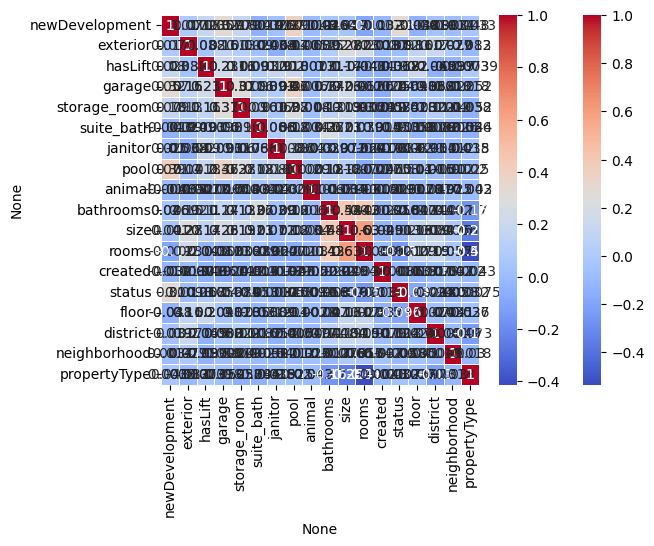

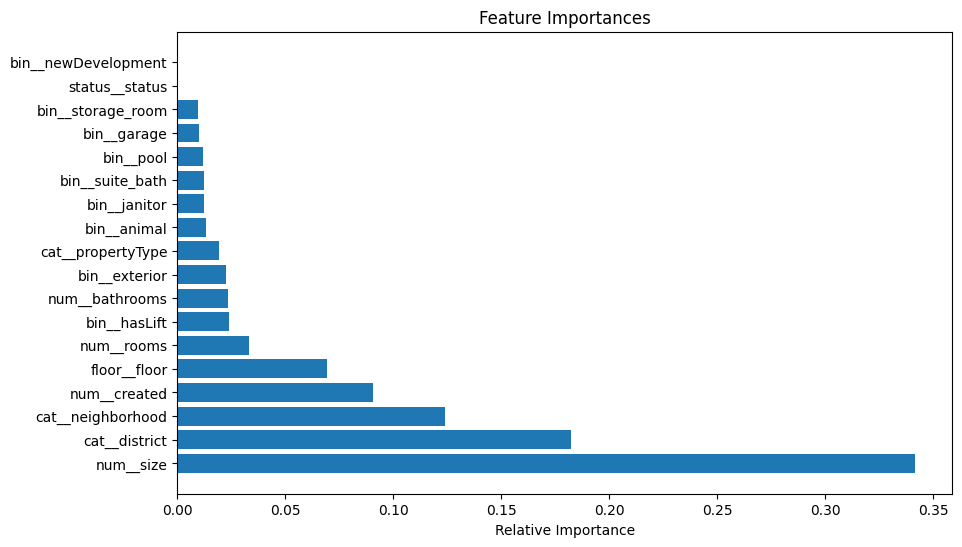

In [167]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())  # Using Random Forest as an example
])
model_pipeline.fit(rents_X_train, rents_y_train)

# Retrieve feature importances from the Random Forest regressor
importances = model_pipeline.named_steps['regressor'].feature_importances_ # Get feature importances

# Retrieve the feature names after preprocessing
feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Plot feature importance for rents
plot_feature_importance(importances, feature_names)


In [168]:
print("Results for rents:")
print_mean_square_error(model_pipeline, rents_X_train, rents_y_train, rents_X_test, rents_y_test)

Results for rents:
Mean Squared Error: 199.56


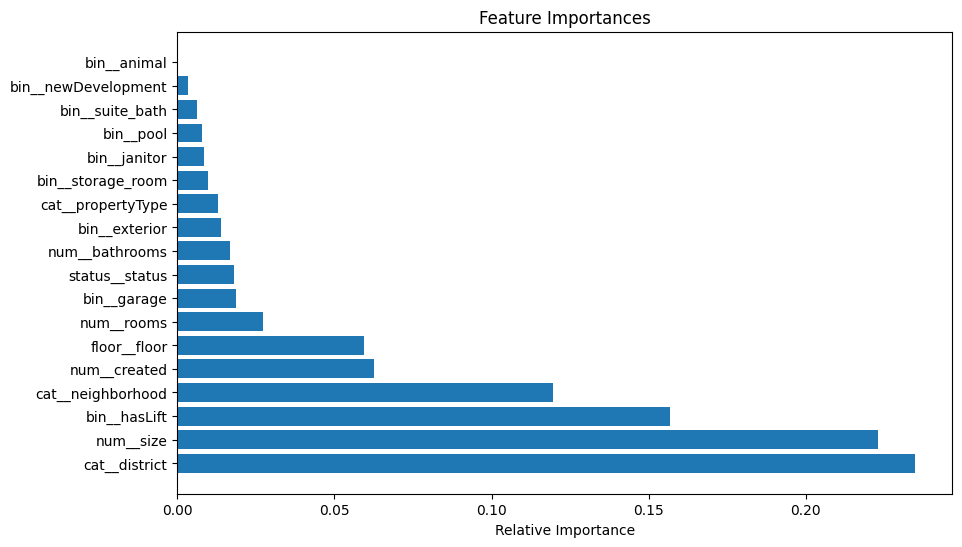

In [169]:
model_pipeline.fit(sales_X_train, sales_y_train)

# Retrieve feature importances from the Random Forest regressor
importances = model_pipeline.named_steps['regressor'].feature_importances_ # Get feature importances

# Retrieve the feature names after preprocessing
feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Plot feature importance for rents
plot_feature_importance(importances, feature_names)

In [170]:
print("Results for sales:")
print_mean_square_error(model_pipeline, sales_X_train, sales_y_train, sales_X_test, sales_y_test)

Results for sales:
Mean Squared Error: 45540.08


In [171]:
# Define the preprocessing steps
non_ordinal_categorical = ['district', 'neighborhood', 'propertyType']
binary_features = ['newDevelopment', 'exterior', 'hasLift', 'garage', 'storage_room', 'suite_bath', 'janitor', 'pool', 'animal']
numerical_features = ['bathrooms', 'size', 'rooms', 'created']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('bin', 'passthrough', binary_features),  # Keep numerical features as they are
        ('num', 'passthrough', numerical_features),
        ('status', StatusValues(), ['status']),
        ('floor', MapFloorValues(), ['floor']),
        ('non_ordinal', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), non_ordinal_categorical)
    ]
)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())  # Using Random Forest as an example
])

In [172]:
print("Results for rents:")
print_mean_square_error(model_pipeline, rents_X_train, rents_y_train, rents_X_test, rents_y_test)

Results for rents:
Mean Squared Error: 196.33


In [173]:
print("Results for rents in trained group:")
print_mean_square_error(model_pipeline, rents_X_train, rents_y_train, rents_X_train, rents_y_train)

Results for rents in trained group:
Mean Squared Error: 76.99


In [174]:
print("Results for sales:")
print_mean_square_error(model_pipeline, sales_X_train, sales_y_train, sales_X_test, sales_y_test)

Results for sales:
Mean Squared Error: 43224.73


In [175]:
print("Results for sales in trained group:")
print_mean_square_error(model_pipeline, sales_X_train, sales_y_train, sales_X_train, sales_y_train)

Results for sales in trained group:
Mean Squared Error: 15661.19


In [176]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluate a regression model on test data and print performance metrics.

    Parameters:
    - model: The trained regression model.
    - X_test: Features of the test dataset.
    - y_test: True target values for the test dataset.

    Returns:
    - metrics: A dictionary containing MSE, MAE, and R² score.
    """
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print metrics
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    
    # Return metrics as a dictionary
    return {
        'mse': mse,
        'mae': mae,
        'r2': r2
    }

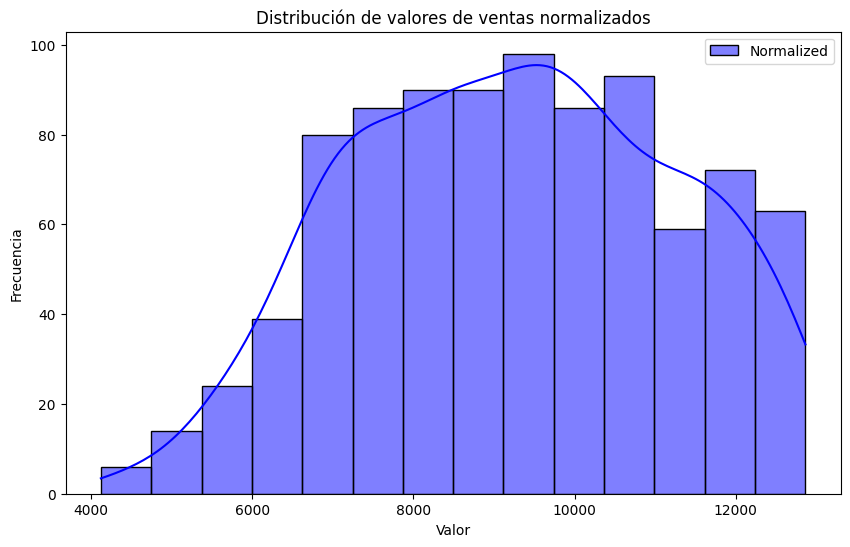

In [177]:
y_box_cox_transformed, lambda_opt = boxcox(sales_y_test)

plt.figure(figsize=(10,6))
sns.histplot(y_box_cox_transformed, kde=True, color='blue', label='Normalized')
plt.title('Distribución de valores de ventas normalizados')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

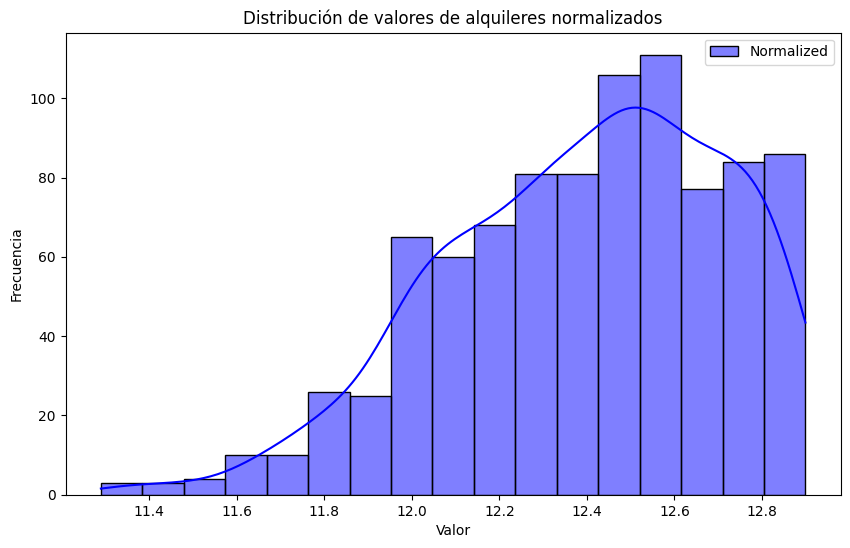

In [178]:
y_log_transformed = np.log(sales_y_test)

plt.figure(figsize=(10,6))
sns.histplot(y_log_transformed, kde=True, color='blue', label='Normalized')
plt.title('Distribución de valores de alquileres normalizados')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

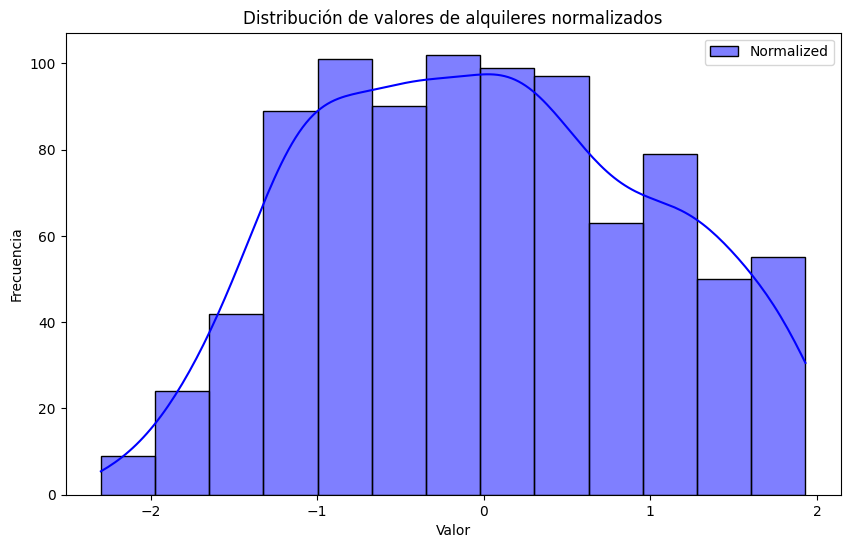

In [179]:
y_standardized = StandardScaler().fit_transform(np.array(sales_y_test).reshape(-1, 1)).flatten()


plt.figure(figsize=(10,6))
sns.histplot(y_standardized, kde=True, color='blue', label='Normalized')
plt.title('Distribución de valores de alquileres normalizados')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

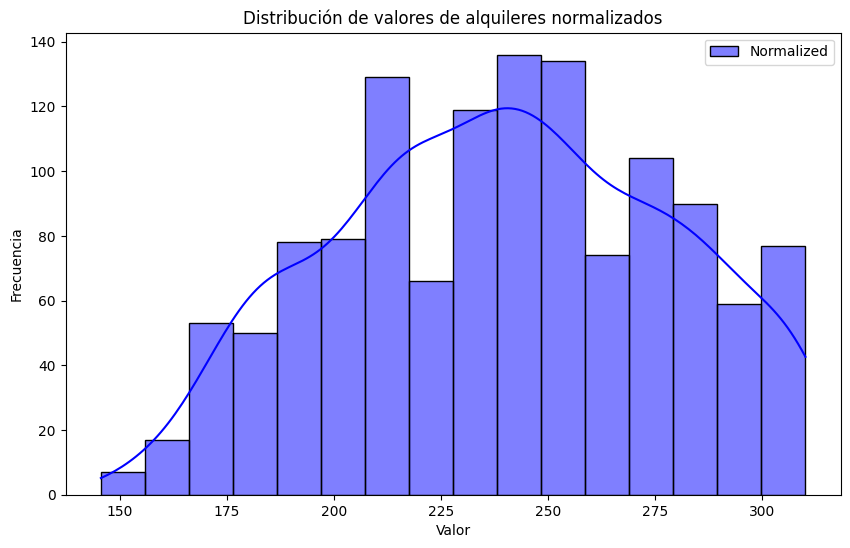

In [180]:
y_box_cox_transformed, lambda_opt = boxcox(rents_y_test)

plt.figure(figsize=(10,6))
sns.histplot(y_box_cox_transformed, kde=True, color='blue', label='Normalized')
plt.title('Distribución de valores de alquileres normalizados')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

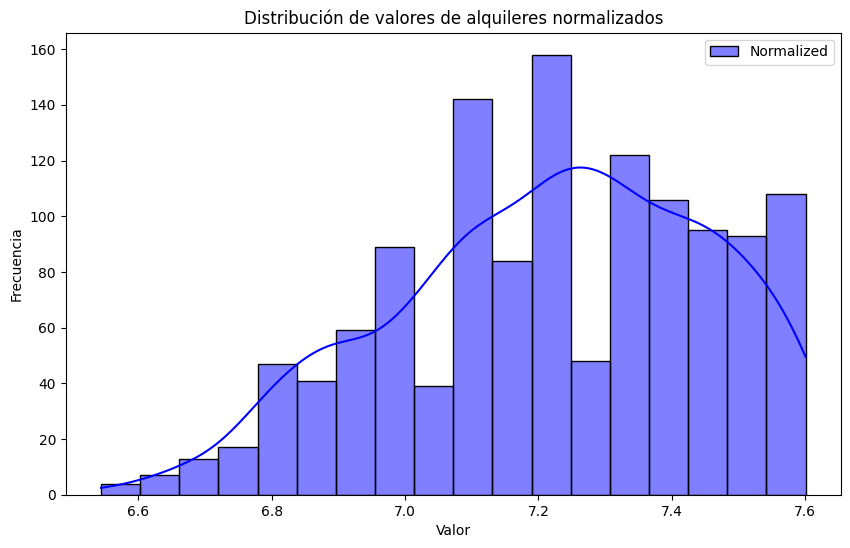

In [181]:
y_log_transformed = np.log(rents_y_test)

plt.figure(figsize=(10,6))
sns.histplot(y_log_transformed, kde=True, color='blue', label='Normalized')
plt.title('Distribución de valores de alquileres normalizados')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

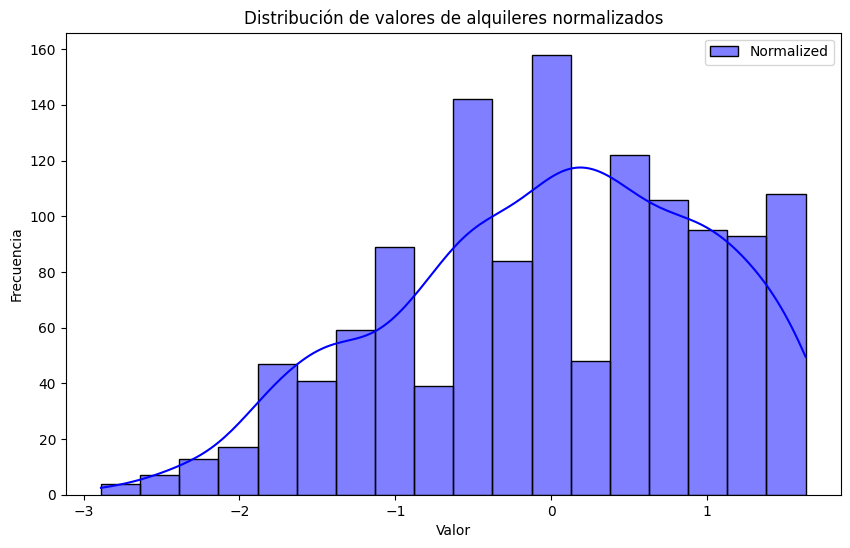

In [182]:
y_standardized = StandardScaler().fit_transform(np.array(y_log_transformed).reshape(-1, 1)).flatten()


plt.figure(figsize=(10,6))
sns.histplot(y_standardized, kde=True, color='blue', label='Normalized')
plt.title('Distribución de valores de alquileres normalizados')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [183]:
model_pipeline_rents_normalized = clone(model_pipeline)
model_pipeline_rents_normalized.fit(rents_X_train, np.log(rents_y_train))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('bin', 'passthrough',
                                                  ['newDevelopment', 'exterior',
                                                   'hasLift', 'garage',
                                                   'storage_room', 'suite_bath',
                                                   'janitor', 'pool',
                                                   'animal']),
                                                 ('num', 'passthrough',
                                                  ['bathrooms', 'size', 'rooms',
                                                   'created']),
                                                 ('status', StatusValues(),
                                                  ['status']),
                                                 ('floor', MapFloorValues(),
                                                  ['floor']),
                                                 ('non_ordinal',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['district', 'neighborhood',
                                                   'propertyType'])])),
                ('regressor', RandomForestRegressor())])

In [184]:
def evaluate_model_antifunction(model, X_test, y_test, lambda_to_apply):
    """
    Evaluate a regression model on test data and print performance metrics.

    Parameters:
    - model: The trained regression model.
    - X_test: Features of the test dataset.
    - y_test: True target values for the test dataset.

    Returns:
    - metrics: A dictionary containing MSE, MAE, and R² score.
    """
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, lambda_to_apply(y_pred))
    mae = mean_absolute_error(y_test, lambda_to_apply(y_pred))
    r2 = r2_score(y_test, lambda_to_apply(y_pred))
    
    # Print metrics
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    
    # Return metrics as a dictionary
    return {
        'mse': mse,
        'mae': mae,
        'r2': r2
    }

def evaluate_model(model, X_test, y_test):
    """
    Evaluate a regression model on test data and print performance metrics.

    Parameters:
    - model: The trained regression model.
    - X_test: Features of the test dataset.
    - y_test: True target values for the test dataset.

    Returns:
    - metrics: A dictionary containing MSE, MAE, and R² score.
    """
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test,(y_pred))
    mae = mean_absolute_error(y_test, (y_pred))
    r2 = r2_score(y_test, (y_pred))
    
    # Print metrics
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    
    # Return metrics as a dictionary
    return {
        'mse': mse,
        'mae': mae,
        'r2': r2
    }

In [185]:
evaluate_model_antifunction(model_pipeline_rents_normalized, rents_X_test, rents_y_test, np.exp)

Mean Squared Error: 38640.7684
Mean Absolute Error: 147.9640
R² Score: 0.6119


{'mse': np.float64(38640.76836167792),
 'mae': np.float64(147.96403335713464),
 'r2': 0.6118970801890172}

In [186]:
evaluate_model_antifunction(model_pipeline_rents_normalized, rents_X_train, rents_y_train, np.exp)

Mean Squared Error: 6360.5977
Mean Absolute Error: 57.8433
R² Score: 0.9357


{'mse': np.float64(6360.597668342732),
 'mae': np.float64(57.8432991678413),
 'r2': 0.9356869542951671}

In [187]:
scaler = StandardScaler()
normalized_rents = scaler.fit_transform(np.array(rents_y_train).reshape(-1,1))

model_pipeline_rents_standard_normalized = clone(model_pipeline)
model_pipeline_rents_standard_normalized.fit(rents_X_train, normalized_rents)

/home/angel/.cache/pypoetry/virtualenvs/idealista-qGROMbGb-py3.10/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('bin', 'passthrough',
                                                  ['newDevelopment', 'exterior',
                                                   'hasLift', 'garage',
                                                   'storage_room', 'suite_bath',
                                                   'janitor', 'pool',
                                                   'animal']),
                                                 ('num', 'passthrough',
                                                  ['bathrooms', 'size', 'rooms',
                                                   'created']),
                                                 ('status', StatusValues(),
                                                  ['status']),
                                                 ('floor', MapFloorValues(),
                                                  ['floor']),
                                                 ('non_ordinal',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['district', 'neighborhood',
                                                   'propertyType'])])),
                ('regressor', RandomForestRegressor())])

In [188]:
inverse_transform = lambda x: scaler.inverse_transform(x.reshape(-1, 1)).flatten()

evaluate_model_antifunction(model_pipeline_rents_standard_normalized, rents_X_test, rents_y_test, inverse_transform)

Mean Squared Error: 38594.6442
Mean Absolute Error: 149.0226
R² Score: 0.6124


{'mse': np.float64(38594.64422321656),
 'mae': np.float64(149.02260538334832),
 'r2': 0.6123603451179924}

In [189]:
evaluate_model_antifunction(model_pipeline_rents_standard_normalized, rents_X_train, rents_y_train, inverse_transform)

Mean Squared Error: 6017.0343
Mean Absolute Error: 57.4071
R² Score: 0.9392


{'mse': np.float64(6017.0343392166205),
 'mae': np.float64(57.40712100677868),
 'r2': 0.9391607794356196}

In [190]:
rents_y_train_transformed, lambda_opt = boxcox(rents_y_train)
rents_y_test_transformed = boxcox(rents_y_test, lmbda=lambda_opt)

# Update the model pipeline and train with the transformed target
model_pipeline_rents_standard_normalized = clone(model_pipeline)
model_pipeline_rents_standard_normalized.fit(rents_X_train, rents_y_train_transformed)

anti_box_cot = lambda x: np.power(lambda_opt * x + 1, 1 / lambda_opt)


evaluate_model_antifunction(model_pipeline_rents_standard_normalized, rents_X_train, rents_y_train, anti_box_cot)

Mean Squared Error: 6106.8612
Mean Absolute Error: 57.4592
R² Score: 0.9383


{'mse': np.float64(6106.861190739185),
 'mae': np.float64(57.459165839981665),
 'r2': 0.9382525254147365}

In [191]:
evaluate_model_antifunction(model_pipeline_rents_standard_normalized, rents_X_test, rents_y_test, anti_box_cot)

Mean Squared Error: 38639.5729
Mean Absolute Error: 148.2935
R² Score: 0.6119


{'mse': np.float64(38639.57290079549),
 'mae': np.float64(148.2934769842815),
 'r2': 0.6119090872447426}

In [192]:
model_pipeline_sales_normalized = clone(model_pipeline)
model_pipeline_sales_normalized.fit(sales_X_train, np.log(sales_y_train))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('bin', 'passthrough',
                                                  ['newDevelopment', 'exterior',
                                                   'hasLift', 'garage',
                                                   'storage_room', 'suite_bath',
                                                   'janitor', 'pool',
                                                   'animal']),
                                                 ('num', 'passthrough',
                                                  ['bathrooms', 'size', 'rooms',
                                                   'created']),
                                                 ('status', StatusValues(),
                                                  ['status']),
                                                 ('floor', MapFloorValues(),
                                                  ['floor']),
                                                 ('non_ordinal',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['district', 'neighborhood',
                                                   'propertyType'])])),
                ('regressor', RandomForestRegressor())])

In [193]:
evaluate_model_antifunction(model_pipeline_sales_normalized, sales_X_test, sales_y_test, np.exp)

Mean Squared Error: 1957142700.4292
Mean Absolute Error: 32323.4914
R² Score: 0.6580


{'mse': np.float64(1957142700.4291852),
 'mae': np.float64(32323.491384953853),
 'r2': 0.6580053894067306}

In [194]:
evaluate_model_antifunction(model_pipeline_sales_normalized, sales_X_train, sales_y_train, np.exp)

Mean Squared Error: 265169272.9552
Mean Absolute Error: 11784.3436
R² Score: 0.9536


{'mse': np.float64(265169272.9552015),
 'mae': np.float64(11784.343639112265),
 'r2': 0.9536412212937515}

In [195]:
scaler = StandardScaler()
normalized_sales = scaler.fit_transform(np.array(sales_y_train).reshape(-1,1))
model_pipeline_sales_normalized = clone(model_pipeline)

model_pipeline_sales_normalized.fit(sales_X_train,normalized_sales)

inverse_transform = lambda x: scaler.inverse_transform(x.reshape(-1, 1)).flatten()
evaluate_model_antifunction(model_pipeline_sales_normalized, sales_X_test, sales_y_test, inverse_transform)

/home/angel/.cache/pypoetry/virtualenvs/idealista-qGROMbGb-py3.10/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 1865843026.7093
Mean Absolute Error: 32037.7141
R² Score: 0.6740


{'mse': np.float64(1865843026.709339),
 'mae': np.float64(32037.714079365076),
 'r2': 0.673959257438052}

In [196]:
evaluate_model_antifunction(model_pipeline_sales_normalized, sales_X_train, sales_y_train, inverse_transform)

Mean Squared Error: 250513984.1983
Mean Absolute Error: 11585.6133
R² Score: 0.9562


{'mse': np.float64(250513984.19832548),
 'mae': np.float64(11585.613336244194),
 'r2': 0.9562033631316218}

In [197]:
sales_y_train_transformed, lambda_opt = boxcox(sales_y_train)
sales_y_test_transformed = boxcox(sales_y_test, lmbda=lambda_opt)

# Update the model pipeline and train with the transformed target
model_pipeline_sales_standard_normalized = clone(model_pipeline)
model_pipeline_sales_standard_normalized.fit(sales_X_train, sales_y_train_transformed)

anti_box_cot = lambda x: np.power(lambda_opt * x + 1, 1 / lambda_opt)


evaluate_model_antifunction(model_pipeline_sales_standard_normalized, sales_X_train, sales_y_train, anti_box_cot)


Mean Squared Error: 251633997.1945
Mean Absolute Error: 11554.5878
R² Score: 0.9560


{'mse': np.float64(251633997.19448262),
 'mae': np.float64(11554.5878102883),
 'r2': 0.9560075544918865}

In [198]:
evaluate_model_antifunction(model_pipeline_sales_standard_normalized, sales_X_test, sales_y_test, anti_box_cot)

Mean Squared Error: 1903469559.5780
Mean Absolute Error: 32111.7049
R² Score: 0.6674


{'mse': np.float64(1903469559.5780463),
 'mae': np.float64(32111.704910211396),
 'r2': 0.6673843298900574}

In [199]:
# Initialize stemmer and stopwords
stemmer = SnowballStemmer('spanish')
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

def preprocess_text(text):
    if pd.isna(text) or not text:
        return ""
    # Lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stopwords and stem
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    return text


[nltk_data] Downloading package stopwords to /home/angel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [200]:
class DescriptionToTF(BaseEstimator, TransformerMixin):
    def __init__(self, max_features=1000, lowercase=True, preprocess=True):
        """
        Parameters:
        - max_features: Maximum number of TF features to keep.
        - stop_words: List of stopwords to remove (e.g., 'english' or a custom list).
        - lowercase: Whether to convert text to lowercase.
        - preprocess: Whether to preprocess the text (remove punctuation, etc.).
        """
        self.max_features = max_features
        self.lowercase = lowercase
        self.preprocess = preprocess
        self.vectorizer = TfidfVectorizer(max_features=max_features) 
        self.stemmer = SnowballStemmer('spanish')
        self.stop_words = set(stopwords.words('spanish'))
        nltk.download('stopwords')
        

    def preprocess_text(self, text):
        if pd.isna(text) or not text:
            return ""
        # Lowercase
        text = text.lower()
        # Remove punctuation and special characters
        text = re.sub(r'[^\w\s]', '', text)
        # Remove stopwords and stem
        text = ' '.join([self.stemmer.stem(word) for word in text.split() if word not in self.stop_words])
        return text

    def fit(self, X, y=None):
        """
        Fit the vectorizer on the preprocessed text.
        """
        if self.preprocess:
            X = X.astype('string').map(self.preprocess_text)
        return self

    def transform(self, X):
        """
        Transform the text into TF features.
        """
        if self.preprocess:
            X = X.astype('string').map(self.preprocess_text)
        tf_features = self.vectorizer.fit_transform(X['description'].values)
        return tf_features.toarray()

    def get_feature_names_out(self):
        """
        Get the names of the TF features.
        """
        return self.vectorizer.get_feature_names_out()

In [201]:
# Define the preprocessing steps
categorical_features = ['district', 'neighborhood', 'propertyType']
binary_features = ['newDevelopment', 'exterior', 'hasLift', 'garage', 'storage_room']
numerical_features = ['bathrooms', 'size', 'rooms']

# Create a preprocessing pipeline
preprocessor_tfid = ColumnTransformer(
    transformers=[
        ('bin', 'passthrough', binary_features),  # Keep numerical features as they are
        ('num', 'passthrough', numerical_features),
        ('description', DescriptionToTF(max_features=25), ['description']),
        ('status', StatusValues(), ['status']),
        ('floor', MapFloorValues(), ['floor']),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan), categorical_features)  # One-hot encode categorical features
    ]
)


tfid_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_tfid),
    ('regressor', RandomForestRegressor()) 
])

[nltk_data] Downloading package stopwords to /home/angel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [202]:
tfid_model_pipeline_sales = clone(tfid_model_pipeline)
tfid_model_pipeline_sales.fit(sales_X_train, sales_y_train)
evaluate_model(tfid_model_pipeline_sales, sales_X_test, sales_y_test)

[nltk_data] Downloading package stopwords to /home/angel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /home/angel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Mean Squared Error: 2644732535.9480
Mean Absolute Error: 40162.7330
R² Score: 0.5379


{'mse': np.float64(2644732535.9479656),
 'mae': np.float64(40162.73301075838),
 'r2': 0.5378547136309844}

In [203]:
model_pipeline_sales = clone(model_pipeline)
model_pipeline_sales.fit(sales_X_train, sales_y_train)
evaluate_model(model_pipeline_sales, sales_X_test, sales_y_test)

Mean Squared Error: 1873825363.8919
Mean Absolute Error: 31919.9767
R² Score: 0.6726


{'mse': np.float64(1873825363.891862),
 'mae': np.float64(31919.97674343434),
 'r2': 0.6725644095836965}

In [204]:
tfid_model_pipeline_rents = clone(tfid_model_pipeline)
tfid_model_pipeline_rents.fit(rents_X_train, rents_y_train)
evaluate_model(tfid_model_pipeline_rents, rents_X_test, rents_y_test)

[nltk_data] Downloading package stopwords to /home/angel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /home/angel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Mean Squared Error: 49129.9457
Mean Absolute Error: 177.2271
R² Score: 0.5065


{'mse': np.float64(49129.945663439496),
 'mae': np.float64(177.22710506740813),
 'r2': 0.5065451291324212}

In [205]:
sales_X_description_test = sales_X_test.copy()
sales_X_description_test['description'] = sales_X_description_test['description'].astype('string').apply(preprocess_text)
sales_X_description_train = sales_X_train.copy()
sales_X_description_train['description'] = sales_X_description_train['description'].astype('string').apply(preprocess_text)
rents_X_description_test = rents_X_test.copy()
rents_X_description_test['description'] = rents_X_description_test['description'].astype('string').apply(preprocess_text)
rents_X_description_train = rents_X_train.copy()
rents_X_description_train['description'] = rents_X_description_train['description'].astype('string').apply(preprocess_text)

In [206]:
# Convert text into word frequency representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sales_X_description_train["description"])

# Get word names
words = vectorizer.get_feature_names_out()

# Compute correlation for each word with y
correlations = {}
for i, word in enumerate(words):
    word_freq = X[:, i].toarray().ravel()  # Convert sparse matrix column to array
    corr, _ = pearsonr(word_freq, sales_y_train)  # Compute Pearson correlation
    correlations[word] = abs(corr)  # Take absolute value

# Get top 20 words by absolute correlation
top_50_words = sorted(correlations.items(), key=lambda x: x[1], reverse=True)[:50]

# Convert to DataFrame and display
top_50_words = pd.DataFrame(top_50_words, columns=["Word", "Abs Correlation"])
print(top_50_words)

         Word  Abs Correlation
0       garaj         0.221940
1        plaz         0.178242
2      empotr         0.174691
3      armari         0.168196
4      porter         0.161121
5      piscin         0.157965
6     traster         0.155807
7       fisic         0.155048
8       ampli         0.142572
9     central         0.139283
10    complet         0.134433
11        tod         0.132991
12       suit         0.132659
13    urbaniz         0.130076
14    respons         0.127871
15        pid         0.125581
16       eleg         0.124278
17   inversor         0.123940
18     exclus         0.121965
19     sistem         0.121873
20    asamble         0.121521
21   ascensor         0.119022
22    edifici         0.118897
23    disfrut         0.118261
24      inclu         0.117812
25     empiec         0.117501
26       gran         0.116943
27        dos         0.116784
28       atic         0.116652
29       ubic         0.116531
30  privilegi         0.114951
31      

In [207]:
# Convert text into word frequency representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(rents_X_description_train["description"])

# Get word names
words = vectorizer.get_feature_names_out()

# Compute correlation for each word with y
correlations = {}
for i, word in enumerate(words):
    word_freq = X[:, i].toarray().ravel()  # Convert sparse matrix column to array
    corr, _ = pearsonr(word_freq, rents_y_train)  # Compute Pearson correlation
    correlations[word] = abs(corr)  # Take absolute value

# Get top 20 words by absolute correlation
top_50_words = sorted(correlations.items(), key=lambda x: x[1], reverse=True)[:50]

# Convert to DataFrame and display
top_50_words = pd.DataFrame(top_50_words, columns=["Word", "Abs Correlation"])
print(top_50_words)

             Word  Abs Correlation
0            suit         0.207959
1             luj         0.165196
2          ficher         0.164038
3           ofrec         0.162554
4     ininterrump         0.160207
5              35         0.159058
6        antigüed         0.157232
7           ampli         0.156924
8             men         0.155482
9          depend         0.151756
10       carreter         0.151168
11            pis         0.151142
12           rati         0.150167
13  plurifamiliar         0.149338
14         gratis         0.146751
15           dobl         0.145510
16        disfrut         0.143305
17         cercan         0.142853
18         exclus         0.142250
19           gran         0.141703
20           madr         0.140655
21       parkings         0.138852
22           firm         0.137699
23         animal         0.135819
24  electrodomest         0.135129
25            dos         0.133931
26            mor         0.133131
27     lavavajill   

In [208]:
param_grid = {
    'n_estimators': [100],
    'min_child_weight': [0.5, 1],
    'gamma': [0, 0.25],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [1, 2],
    'reg_lambda': [5, 10],
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
xboostregressor_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', grid_search) 
])

In [209]:
scaler = StandardScaler()

normalized_rents = scaler.fit_transform(np.array(rents_y_train).reshape(-1,1))

shift_value = abs(normalized_rents.min()) + 1  
normalized_rents += shift_value

xboostregressor_rents = clone(xboostregressor_model_pipeline)
xboostregressor_rents.fit(rents_X_train, normalized_rents)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=0.5, n_estimators=100, reg_alpha=1, reg_lambda=5, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=0.5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=0.5, n_estimators=100, reg_alpha=2, reg_lambda=5, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=0.5, n_estimators=100, reg_alpha=2, reg_lambda=10, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=0.5, n_estimators=100, reg_alpha=1, reg_lambda=5, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_d

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('bin', 'passthrough',
                                                  ['newDevelopment', 'exterior',
                                                   'hasLift', 'garage',
                                                   'storage_room', 'suite_bath',
                                                   'janitor', 'pool',
                                                   'animal']),
                                                 ('num', 'passthrough',
                                                  ['bathrooms', 'size', 'rooms',
                                                   'created']),
                                                 ('status', StatusValues(),
                                                  ['status']),
                                                 ('floor', MapFloorValues(),
                                                  ['floor']),
                                                 ('non_ordinal',
                                                  OneHotEncod...
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...),
                              n_jobs=-1,
                              param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                                          'gamma': [0, 0.25],
                                          'learning_rate': [0.05, 0.1],
                                          'max_depth': [3, 6],
                                          'min_child_weight': [0.5, 1],
                                          'n_estimators': [100],
                                          'reg_alpha': [1, 2],
                                          'reg_lambda': [5, 10],
                                          'subsample': [0.8]},
                              scoring='neg_mean_squared_error', verbose=2))])

In [210]:
xboostregressor_rents.named_steps['regressor'].best_params_

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 0.5,
 'n_estimators': 100,
 'reg_alpha': 1,
 'reg_lambda': 5,
 'subsample': 0.8}

In [211]:
inverse_transform = lambda x: scaler.inverse_transform((x.reshape(-1, 1) - shift_value)).flatten()

evaluate_model_antifunction(xboostregressor_rents, rents_X_train, rents_y_train, inverse_transform)

Mean Squared Error: 33499.1503
Mean Absolute Error: 143.0319
R² Score: 0.6613


{'mse': np.float64(33499.15026134983),
 'mae': np.float64(143.0318891394266),
 'r2': 0.661284600257919}

In [212]:
evaluate_model_antifunction(xboostregressor_rents, rents_X_test, rents_y_test, inverse_transform)

Mean Squared Error: 41125.7442
Mean Absolute Error: 158.7771
R² Score: 0.5869


{'mse': np.float64(41125.74421450423),
 'mae': np.float64(158.77706995920352),
 'r2': 0.5869383015458329}

In [213]:
scaler = StandardScaler()

normalized_sales = scaler.fit_transform(np.array(sales_y_train).reshape(-1,1))

shift_value = abs(normalized_sales.min()) + 1  
normalized_sales = scaler.fit_transform(np.array(sales_y_train).reshape(-1,1))
normalized_sales += shift_value

xboostregressor_sales = clone(xboostregressor_model_pipeline)
xboostregressor_sales.fit(sales_X_train, normalized_sales)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=0.5, n_estimators=100, reg_alpha=1, reg_lambda=5, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=0.5, n_estimators=100, reg_alpha=1, reg_lambda=5, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=0.5, n_estimators=100, reg_alpha=1, reg_lambda=5, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=0.5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=0.5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_d

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('bin', 'passthrough',
                                                  ['newDevelopment', 'exterior',
                                                   'hasLift', 'garage',
                                                   'storage_room', 'suite_bath',
                                                   'janitor', 'pool',
                                                   'animal']),
                                                 ('num', 'passthrough',
                                                  ['bathrooms', 'size', 'rooms',
                                                   'created']),
                                                 ('status', StatusValues(),
                                                  ['status']),
                                                 ('floor', MapFloorValues(),
                                                  ['floor']),
                                                 ('non_ordinal',
                                                  OneHotEncod...
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...),
                              n_jobs=-1,
                              param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                                          'gamma': [0, 0.25],
                                          'learning_rate': [0.05, 0.1],
                                          'max_depth': [3, 6],
                                          'min_child_weight': [0.5, 1],
                                          'n_estimators': [100],
                                          'reg_alpha': [1, 2],
                                          'reg_lambda': [5, 10],
                                          'subsample': [0.8]},
                              scoring='neg_mean_squared_error', verbose=2))])

In [214]:
xboostregressor_sales.named_steps['regressor'].best_params_

{'colsample_bytree': 0.9,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 0.5,
 'n_estimators': 100,
 'reg_alpha': 1,
 'reg_lambda': 5,
 'subsample': 0.8}

In [215]:
inverse_transform = lambda x: scaler.inverse_transform((x.reshape(-1, 1) - shift_value)).flatten()

evaluate_model_antifunction(xboostregressor_sales, sales_X_train, sales_y_train, inverse_transform)

Mean Squared Error: 1216181730.2691
Mean Absolute Error: 26973.0232
R² Score: 0.7874


{'mse': np.float64(1216181730.2691288),
 'mae': np.float64(26973.02316958433),
 'r2': 0.7873784580249834}

In [216]:
evaluate_model_antifunction(xboostregressor_sales, sales_X_test, sales_y_test, inverse_transform)

Mean Squared Error: 1787265300.6896
Mean Absolute Error: 32503.4895
R² Score: 0.6877


{'mse': np.float64(1787265300.6896467),
 'mae': np.float64(32503.48950593439),
 'r2': 0.6876900696090379}

In [217]:
sales_y_preds = inverse_transform(xboostregressor_sales.predict(sales_X))
rents_y_preds = xboostregressor_rents.predict(rents_X)
sales_preditected_rents = xboostregressor_rents.predict(sales_X)

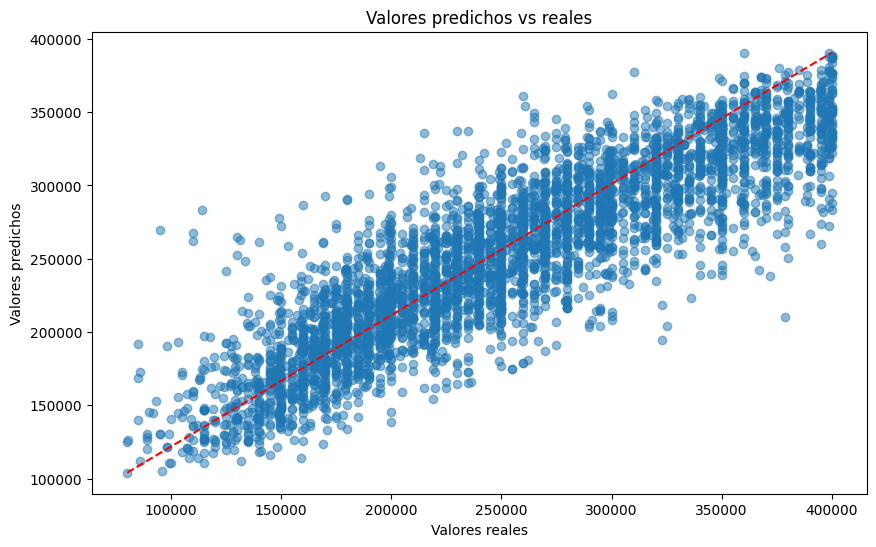

In [218]:
plt.figure(figsize=(10,6))
plt.scatter(sales_y, sales_y_preds, alpha=0.5)
plt.plot([min(sales_y), max(sales_y)], [min(sales_y_preds), max(sales_y_preds)], color='red', linestyle='--')
plt.title('Valores predichos vs reales')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.show()


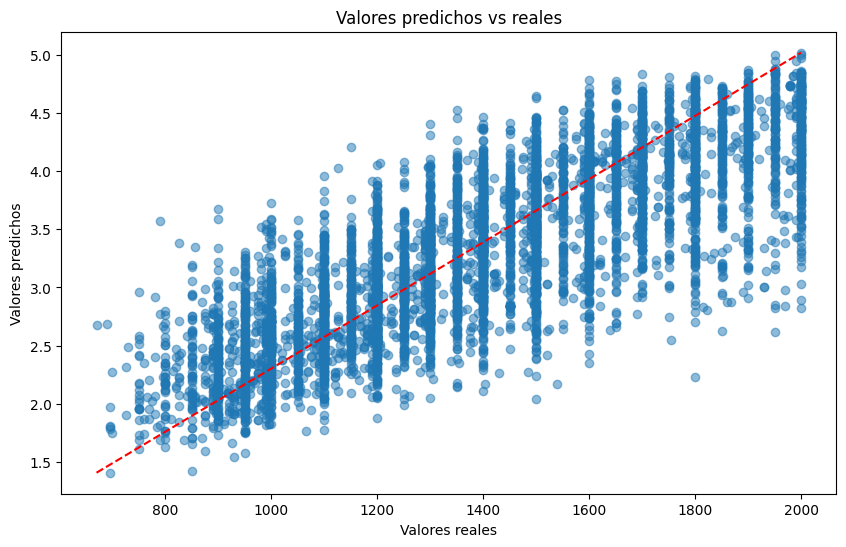

In [219]:
plt.figure(figsize=(10,6))
plt.scatter(rents_y, rents_y_preds, alpha=0.5)
plt.plot([min(rents_y), max(rents_y)], [min(rents_y_preds), max(rents_y_preds)], color='red', linestyle='--')
plt.title('Valores predichos vs reales')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.show()


In [220]:
sales_y_series = pd.Series(sales_y, name='y', index=sales_X.index)
sales_y_preds_series = pd.Series(sales_y_preds, name='y_pred', index=sales_X.index)
sales_preditected_rents = pd.Series(sales_preditected_rents, name='rents_pred', index=sales_X.index)
sales_y_diff_series = sales_y_series - sales_y_preds_series
rents_predicted_per_real_value = sales_preditected_rents / sales_y_series
rents_predicted_per_stimated_value =  sales_preditected_rents / sales_y_preds_series
sales_pred = pd.concat([sales_X, sales_y_series, sales_y_preds_series, sales_y_diff_series.rename('y_diff'), sales_preditected_rents, rents_predicted_per_real_value.rename('rents_per_real'), rents_predicted_per_stimated_value.rename('rents_per_stimated')], axis=1)
sales_pred.to_csv('sales_y_pred.csv', index=False)

rents_y_series = pd.Series(rents_y, name='y', index=rents_X.index)
rents_y_preds_series = pd.Series(rents_y_preds, name='y_pred', index=rents_X.index)
rents_y_diff_series = rents_y_series - rents_y_preds_series
rents_pred = pd.concat([rents_X, rents_y_series, rents_y_preds_series, rents_y_diff_series.rename('y_diff')], axis=1)
rents_pred.to_csv('rents_y_pred.csv', index=False)

In [221]:
def filter_top_percent(df, column, percent):
    threshold = df[column].quantile(percent) 
    return df[df[column] <= threshold] 

def filter_abs_percent(df, column, percent):
    threshold = df[column].abs().quantile(percent) 
    return df[df[column].abs() <= threshold] 

def filter_bottom_percent(df, column, percent):
    threshold = -df[column].quantile(percent) 
    return df[-df[column] >= threshold] 


In [222]:
sales_pred_quantil = filter_abs_percent(sales_pred, 'y_diff', 0.975)
rents_pred_quantil = filter_abs_percent(rents_pred, 'y_diff', 0.9)


In [223]:
columns_to_remove = ['y_diff', 'rents_pred', 'rents_per_real', 'rents_per_stimated', 'y_pred']
sales_quantil = sales_pred_quantil.drop(columns=columns_to_remove)
rents_quantil = rents_pred_quantil.drop(columns=['y_diff', 'y_pred'])

In [224]:
def split_dataframe(df, target_column):
    y_pandas = df[[target_column]]         # Select the target column as a DataFrame
    X_pandas = df.drop(columns=[target_column])  # Drop the target column for X
    return X_pandas, y_pandas

In [225]:
rents_X_quantil, rents_y_quantil = split_dataframe(rents_quantil, 'y')
sales_X_quantil, sales_y_quantil = split_dataframe(sales_quantil, 'y')

In [226]:
len(rents_X_quantil), len(sales_X_quantil)

(5722, 4386)

In [227]:
rents_X_train_quantil, rents_X_test_quantil, rents_y_train_quantil, rents_y_test_quantil = train_test_split(rents_X_quantil, rents_y_quantil, test_size=0.2, random_state=42)
sales_X_train_quantil, sales_X_test_quantil, sales_y_train_quantil, sales_y_test_quantil = train_test_split(sales_X_quantil, sales_y_quantil, test_size=0.2, random_state=42)

In [228]:
rents_X_train_quantil.size, rents_X_test_quantil.size, rents_y_train_quantil.size, rents_y_test_quantil.size

(178503, 44655, 4577, 1145)

In [229]:
param_grid = {
    'n_estimators': [100],
    'min_child_weight': [0.5, 1],
    'gamma': [0, 0.25],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [1, 2],
    'reg_lambda': [5, 10],
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
xboostregressor_normalized_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', grid_search) 
])

pipeline = TransformedTargetRegressor(
    regressor=xboostregressor_normalized_model_pipeline,
    transformer=StandardScaler()  
    )

In [230]:
pipeline_sales = clone(pipeline)
pipeline_sales.fit(sales_X_train_quantil, sales_y_train_quantil)
sales_y_preds_quantil = pipeline_sales.predict(sales_X_test_quantil)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=0.5, n_estimators=100, reg_alpha=1, reg_lambda=5, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=0.5, n_estimators=100, reg_alpha=1, reg_lambda=5, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=0.5, n_estimators=100, reg_alpha=1, reg_lambda=5, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=0.5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=0.5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_d

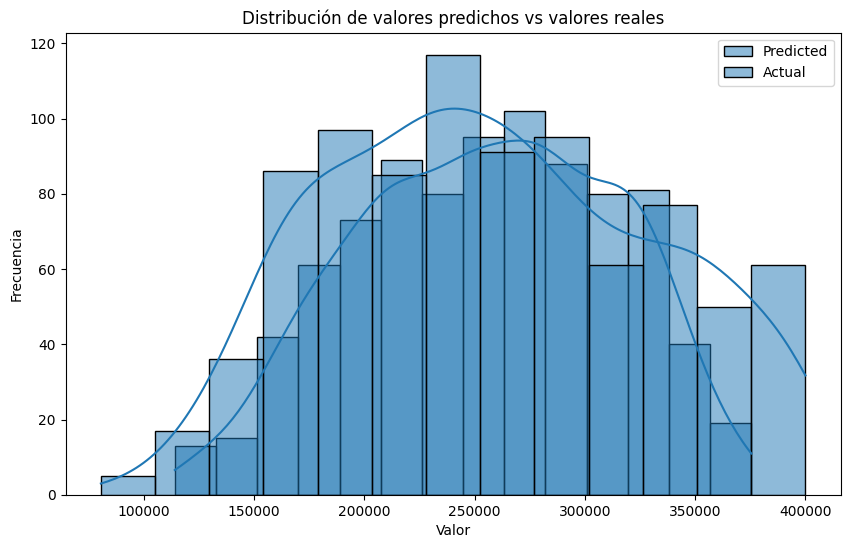

In [231]:
plt.figure(figsize=(10,6))
sns.histplot(sales_y_preds_quantil, kde=True, color='red', label='Predicted')
sns.histplot(sales_y_test_quantil, kde=True, color='blue', label='Actual')
plt.title('Distribución de valores predichos vs valores reales')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [232]:
evaluate_model(pipeline_sales, sales_X_test_quantil, sales_y_test_quantil)
evaluate_model(pipeline_sales, sales_X_test, sales_y_test)

Mean Squared Error: 1411299179.7545
Mean Absolute Error: 29721.6178
R² Score: 0.7405
Mean Squared Error: 1584690371.7508
Mean Absolute Error: 29383.5669
R² Score: 0.7231


{'mse': np.float64(1584690371.7507558),
 'mae': np.float64(29383.566909722223),
 'r2': 0.723088374455804}

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=0.5, n_estimators=100, reg_alpha=1, reg_lambda=5, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=0.5, n_estimators=100, reg_alpha=1, reg_lambda=5, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=0.5, n_estimators=100, reg_alpha=1, reg_lambda=5, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=0.5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=0.5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_d

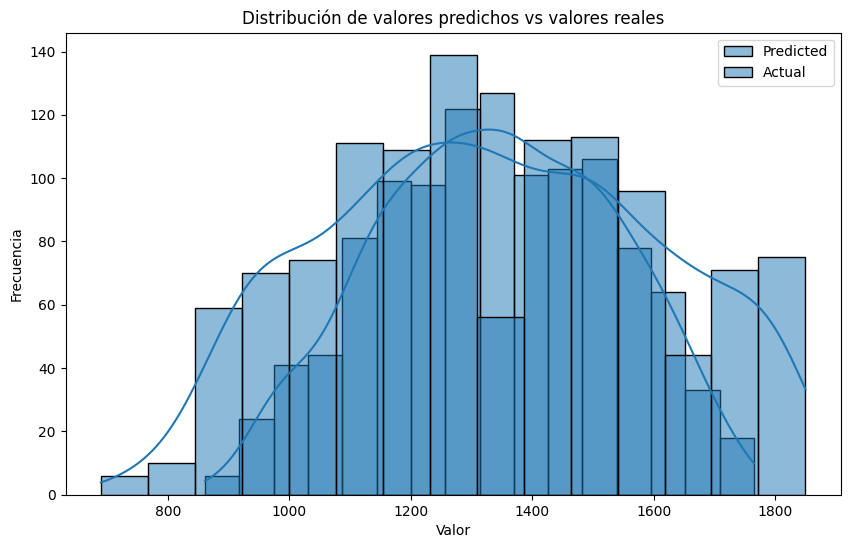

In [233]:
pipeline_rents = clone(pipeline)
pipeline_rents.fit(rents_X_train_quantil, rents_y_train_quantil)
rents_y_preds_quantil = pipeline_rents.predict(rents_X_test_quantil)
sns.reset_orig()
plt.figure(figsize=(10,6))
sns.histplot(rents_y_preds_quantil, kde=True, color='blue', label='Predicted')
sns.histplot(rents_y_test_quantil, kde=True, color='red', label='Actual')
plt.title('Distribución de valores predichos vs valores reales')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [234]:
evaluate_model(pipeline_rents, rents_X_test_quantil, rents_y_test_quantil)
evaluate_model(pipeline_rents, rents_X_test, rents_y_test)

Mean Squared Error: 32251.1003
Mean Absolute Error: 141.2066
R² Score: 0.5568
Mean Squared Error: 39208.9954
Mean Absolute Error: 149.8293
R² Score: 0.6062


{'mse': np.float64(39208.99542630511),
 'mae': np.float64(149.82934004105863),
 'r2': 0.6061898804554802}

In [243]:
pipeline_rents

TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(transformers=[('bin',
                                                                                       'passthrough',
                                                                                       ['newDevelopment',
                                                                                        'exterior',
                                                                                        'hasLift',
                                                                                        'garage',
                                                                                        'storage_room',
                                                                                        'suite_bath',
                                                                                        'janitor',
                                                                                        'pool',
                                                                                        'animal']),
                                                                                      ('num',
                                                                                       'passthrough',
                                                                                       ['bathrooms',
                                                                                        'size',
                                                                                        'rooms',
                                                                                        'created']),
                                                                                      ('status',
                                                                                       StatusValues(),
                                                                                       ['status']),
                                                                                      ('floor',
                                                                                       MapFloorValues(),...
                                                                                          n_jobs=None,
                                                                                          num_parallel_tree=None,
                                                                                          random_state=None, ...),
                                                                   n_jobs=-1,
                                                                   param_grid={'colsample_bytree': [0.8,
                                                                                                    0.9,
                                                                                                    1.0],
                                                                               'gamma': [0,
                                                                                         0.25],
                                                                               'learning_rate': [0.05,
                                                                                                 0.1],
                                                                               'max_depth': [3,
                                                                                             6],
                                                                               'min_child_weight': [0.5,
                                                                                                    1],
                                                                               'n_estimators': [100],
                                                                               'reg_alpha': [1,
               

In [245]:
joblib.dump(pipeline_rents.regressor, "../model/rents-model.pkl")
joblib.dump(pipeline_sales.regressor, "../model/sales-model.pkl")


['../model/sales-model.pkl']